In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Define filter functions
def low_pass_filter(signal, cutoff, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

def high_pass_filter(signal, cutoff, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, signal)

def band_pass_filter(signal, low_cutoff, high_cutoff, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = butter(order, [low, high], btype='band', analog=False)
    return filtfilt(b, a, signal)

def band_reject_filter(signal, low_cutoff, high_cutoff, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = butter(order, [low, high], btype='bandstop', analog=False)
    return filtfilt(b, a, signal)


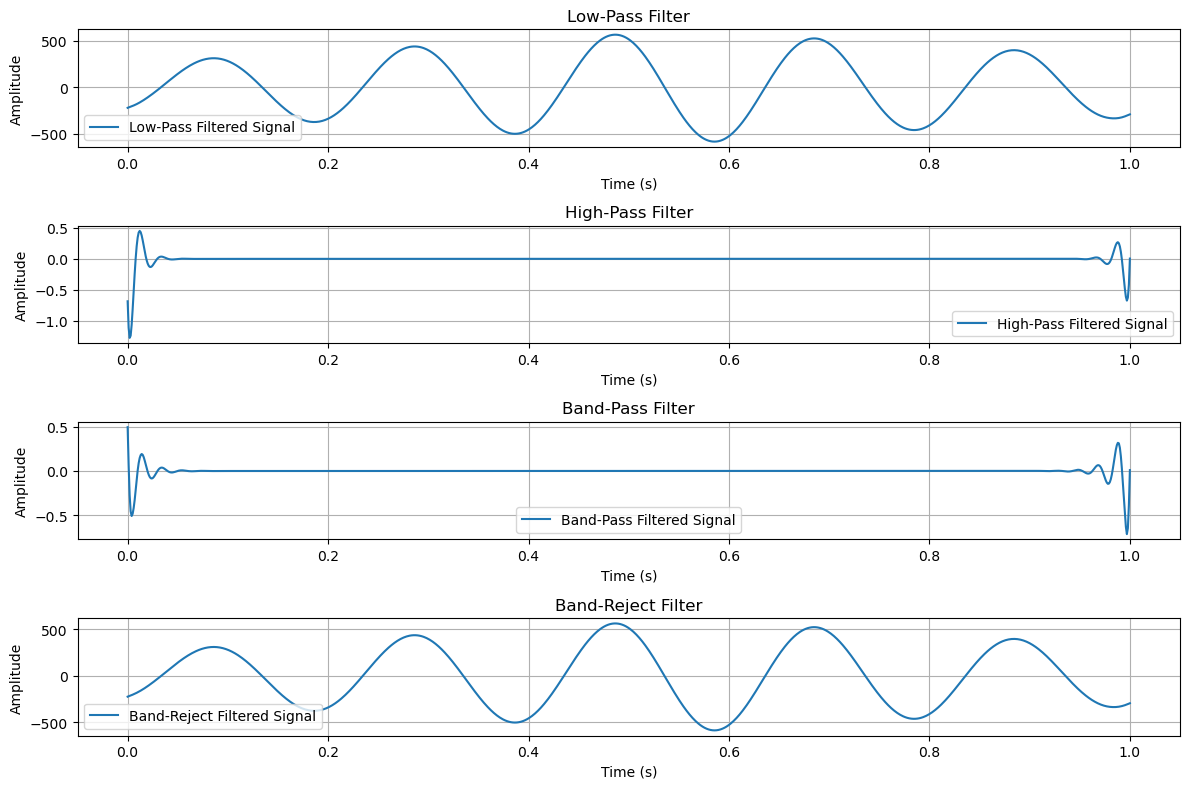

In [47]:
# Assume convolved_signal is the signal to be filtered
# Parameters
sampling_rate = 1000  # Hz
cutoff_low = 50  # Hz for low-pass and high-pass filters
cutoff_high = 200  # Hz for band-pass and band-reject filters

# Apply the filters
low_pass_result = low_pass_filter(convolved_signal, cutoff_low, sampling_rate)
high_pass_result = high_pass_filter(convolved_signal, cutoff_low, sampling_rate)
band_pass_result = band_pass_filter(convolved_signal, cutoff_low, cutoff_high, sampling_rate)
band_reject_result = band_reject_filter(convolved_signal, cutoff_low, cutoff_high, sampling_rate)

# Plot the results
time = np.linspace(0, len(convolved_signal) / sampling_rate, len(convolved_signal))

plt.figure(figsize=(12, 8))

# Low-pass filter
plt.subplot(4, 1, 1)
plt.plot(time, low_pass_result, label="Low-Pass Filtered Signal")
plt.title("Low-Pass Filter")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# High-pass filter
plt.subplot(4, 1, 2)
plt.plot(time, high_pass_result, label="High-Pass Filtered Signal")
plt.title("High-Pass Filter")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# Band-pass filter
plt.subplot(4, 1, 3)
plt.plot(time, band_pass_result, label="Band-Pass Filtered Signal")
plt.title("Band-Pass Filter")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# Band-reject filter
plt.subplot(4, 1, 4)
plt.plot(time, band_reject_result, label="Band-Reject Filtered Signal")
plt.title("Band-Reject Filter")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()